In [5]:
#pip install riotwatcher

In [6]:
import requests
import json
from riotwatcher import LolWatcher, ApiError
import pandas as pd
import pprint
import time
import numpy as np

In [10]:
api_key = 'RGAPI-d8aae548-2f34-463b-9487-0f81e21001ba'
watcher = LolWatcher(api_key)
my_region = 'na1'

me = watcher.summoner.by_name(my_region, 'Razei')
print(me)

{'id': 'aZMEYFiCcsaOrIMqgE3BvP0pft3h3SLmrfMZM0D_lbsnFZ8', 'accountId': 'NXch5UZaT-3KqzmIlcuGyhRBA-EsThsMFqQuKm7kXow61Q', 'puuid': 'MbAw2AxC6jMJrosC_xpz-T76NW3D6bupbFlCUGZAYFpRH7J3oL6FMici0qTMZPo1XJ4Mozrhn2_zBQ', 'name': 'Razei', 'profileIconId': 508, 'revisionDate': 1649909842000, 'summonerLevel': 300}


In [11]:
my_ranked_stats = watcher.league.by_summoner(my_region, me['id'])
pprint.pprint(my_ranked_stats)

[{'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': 'eacbcca2-2861-402b-b738-f684da32edbf',
  'leaguePoints': 53,
  'losses': 86,
  'queueType': 'RANKED_FLEX_SR',
  'rank': 'II',
  'summonerId': 'aZMEYFiCcsaOrIMqgE3BvP0pft3h3SLmrfMZM0D_lbsnFZ8',
  'summonerName': 'Razei',
  'tier': 'PLATINUM',
  'veteran': False,
  'wins': 85}]


In [12]:
total_games_plays = my_ranked_stats[0]['wins'] + my_ranked_stats[0]['losses']

my_matches = []

my_matches.extend(watcher.match.matchlist_by_puuid('americas', me['puuid'], 0, 100))
pprint.pprint(my_matches)

['NA1_4278998069',
 'NA1_4278966623',
 'NA1_4278984129',
 'NA1_4276702437',
 'NA1_4276593944',
 'NA1_4274741261',
 'NA1_4273788652',
 'NA1_4273786835',
 'NA1_4273766169',
 'NA1_4273774320',
 'NA1_4273574891',
 'NA1_4273557837',
 'NA1_4272221857',
 'NA1_4272169231',
 'NA1_4269737723',
 'NA1_4269704272',
 'NA1_4263463176',
 'NA1_4263461087',
 'NA1_4263428185',
 'NA1_4263415065',
 'NA1_4261438986',
 'NA1_4261407831',
 'NA1_4261450115',
 'NA1_4259722476',
 'NA1_4260677732',
 'NA1_4260644937',
 'NA1_4260659846',
 'NA1_4259615084',
 'NA1_4259594245',
 'NA1_4258666602',
 'NA1_4258671478',
 'NA1_4258634763',
 'NA1_4258640045',
 'NA1_4258560537',
 'NA1_4258513241',
 'NA1_4257634684',
 'NA1_4257527563',
 'NA1_4257541308',
 'NA1_4257454685',
 'NA1_4257337401',
 'NA1_4256737554',
 'NA1_4256755204',
 'NA1_4256762578',
 'NA1_4256712868',
 'NA1_4256658929',
 'NA1_4256665051',
 'NA1_4255877735',
 'NA1_4255903877',
 'NA1_4255872313',
 'NA1_4255838646',
 'NA1_4255814994',
 'NA1_4255788988',
 'NA1_425509

In [13]:
#my_matches = watcher.match.matchlist_by_puuid('americas', me['puuid'])
table = []
for my_match in my_matches:
    match_detail = watcher.match.by_id('americas', my_match)

    info = {}
    team_total_damages_to_champs = 0
    
    try:
    
        if match_detail["info"]['gameMode'] == 'CLASSIC':
            for participant in match_detail["info"]["participants"]:
                if participant["summonerName"] == me['name']:
                    info["ChampionName"] = participant['championName']
                    info["ChampionLevel"] = participant['champLevel']
                    info["Lane"] = participant['lane']
                    info["Kills"] = participant['kills']
                    info["Deaths"] = participant['deaths']
                    info["Assists"] = participant['assists']
                    info["Gold_Earned"] = participant['goldEarned']
                    info["Total_Minions_Killed"] = participant['totalMinionsKilled']
                    info["Total_damages_to_champs"] = participant['totalDamageDealtToChampions']
                    info["Win/Lose"] = participant['win']
                    info["TeamBaronKills"] = participant['challenges']['teamBaronKills']
                    info["FirstBloodAssist"] = participant['firstBloodAssist']
                    info["FirstBloodKill"] = participant['firstBloodKill']
                    info["FirstTowerAssist"] = participant['firstTowerAssist']
                    info["FirstTowerKill"] = participant['firstTowerKill']
                    info["InhibitorKills"] = participant['inhibitorKills']
                    info["InhibitorTakedowns"] = participant['inhibitorTakedowns']
                    info["InhibitorsLost"] = participant['inhibitorsLost']
                    info["TurretPlatesTaken"] = participant['challenges']['turretPlatesTaken']



            for participant in match_detail["info"]["participants"]:
                if participant['win'] == info["Win/Lose"]:
                    team_total_damages_to_champs += participant['totalDamageDealtToChampions']

            info["TotalDamageDealtToChampions_Percentage"] = round(info["Total_damages_to_champs"] / team_total_damages_to_champs * 100, 2)

            table.append(info)
            time.sleep(0.1)

    except:
        print('Error')

pprint.pprint(table)


[{'Assists': 13,
  'ChampionLevel': 17,
  'ChampionName': 'Syndra',
  'Deaths': 8,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 14247,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 0,
  'InhibitorsLost': 2,
  'Kills': 8,
  'Lane': 'MIDDLE',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 22.43,
  'Total_Minions_Killed': 214,
  'Total_damages_to_champs': 28569,
  'TurretPlatesTaken': 2,
  'Win/Lose': False},
 {'Assists': 7,
  'ChampionLevel': 18,
  'ChampionName': 'Orianna',
  'Deaths': 4,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 15873,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 0,
  'InhibitorsLost': 0,
  'Kills': 6,
  'Lane': 'MIDDLE',
  'TeamBaronKills': 1,
  'TotalDamageDealtToChampions_Percentage': 22.26,
  'Total_Minions_Killed': 254,
  'Total_damages_to_champs': 22887,
  'TurretPlatesTak

In [14]:
df = pd.DataFrame(table)
df

,ChampionName,ChampionLevel,Lane,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,Win/Lose,TeamBaronKills,FirstBloodAssist,FirstBloodKill,FirstTowerAssist,FirstTowerKill,InhibitorKills,InhibitorTakedowns,InhibitorsLost,TurretPlatesTaken,TotalDamageDealtToChampions_Percentage
0,Syndra,17,MIDDLE,8,8,13,14247,214,28569,False,0,False,False,False,False,0,0,2,2,22.43
1,Orianna,18,MIDDLE,6,4,7,15873,254,22887,True,1,False,False,False,False,0,0,0,2,22.26
2,Leblanc,18,MIDDLE,12,3,9,14063,163,38854,False,1,False,False,False,False,0,0,5,0,21.52
3,Draven,15,MIDDLE,16,11,7,18115,207,25894,False,0,True,False,True,False,0,0,3,6,38.05
4,Samira,11,BOTTOM,10,8,3,12402,152,20808,False,0,False,False,False,False,0,0,1,2,37.86
5,Ezreal,12,BOTTOM,17,2,3,12657,143,19685,True,0,False,False,False,False,0,1,0,3,33.74
6,Evelynn,10,NONE,6,0,4,6663,8,4553,True,0,False,False,False,True,0,0,0,2,13.41
7,Xerath,14,BOTTOM,10,3,7,12605,77,32501,False,1,False,False,False,False,0,0,3,0,35.67
8,Diana,15,JUNGLE,15,0,4,13225,36,13725,True,1,False,False,False,False,0,1,0,0,24.04
9,Xerath,13,MIDDLE,4,4,6,9109,143,17449,False,0,False,False,False,False,0,0,1,0,24.40


In [15]:
CookiesandCream_df = pd.read_csv("Resources/CookiesandCream_Gold.csv")
CookiesandCream_df = CookiesandCream_df.drop(['Unnamed: 0'], axis = 1)

trade_df = pd.read_csv("Resources/I_will_trade_Challenger.csv")
trade_df  = trade_df .drop(['Unnamed: 0'], axis = 1)

iron_4 = pd.read_csv("Resources/iron_4_Iron.csv")
iron_4  = iron_4.drop(['Unnamed: 0'], axis = 1)

MeleezaNoober_df = pd.read_csv("Resources/MeleezaNoober_Silver.csv")
MeleezaNoober_df = MeleezaNoober_df.drop(['Unnamed: 0'], axis = 1)

Razei_df = pd.read_csv("Resources/Razei_Platinum.csv")
Razei_df = Razei_df.drop(['Unnamed: 0'], axis = 1)

soldr_df = pd.read_csv("Resources/Soldr_Diamond.csv")
soldr_df  = soldr_df.drop(['Unnamed: 0'], axis = 1)

syptime_df = pd.read_csv("Resources/syptime_Bronze.csv")
syptime_df  = syptime_df.drop(['Unnamed: 0'], axis = 1)

xRoyal_Master_df = pd.read_csv("Resources/xRoyal_Master.csv")
xRoyal_Master_df  = xRoyal_Master_df .drop(['Unnamed: 0'], axis = 1)

Yozu_Grandmaster_df = pd.read_csv("Resources/Yozu_Grandmaster.csv")
Yozu_Grandmaster_df = Yozu_Grandmaster_df.drop(['Unnamed: 0'], axis = 1)


In [16]:
frames = [df, CookiesandCream_df, trade_df, iron_4, 
          MeleezaNoober_df, Razei_df,soldr_df, syptime_df, xRoyal_Master_df, Yozu_Grandmaster_df]
df_final = pd.concat(frames)
df_final = pd.get_dummies(df_final,
                          columns=['Lane','FirstBloodAssist', 'FirstBloodKill', 'FirstTowerKill', 'FirstTowerAssist'])
df_final['Win'] = np.where(df_final['Win/Lose'] == True, 1, 0) 
df_final = df_final.drop(['Win/Lose', 'ChampionName'], axis = 1)
df_final

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True,Win
0,17,8,8,13,14247,214,28569,0,0,0,...,0,1,0,1,0,1,0,1,0,0
1,18,6,4,7,15873,254,22887,1,0,0,...,0,1,0,1,0,1,0,1,0,1
2,18,12,3,9,14063,163,38854,1,0,0,...,0,1,0,1,0,1,0,1,0,0
3,15,16,11,7,18115,207,25894,0,0,0,...,0,0,1,1,0,1,0,0,1,0
4,11,10,8,3,12402,152,20808,0,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,14,5,3,9,11586,40,26904,2,0,1,...,0,1,0,1,0,0,1,1,0,1
85,11,7,9,7,9949,27,26613,0,0,0,...,0,1,0,1,0,1,0,0,1,0
86,15,9,8,4,14122,200,20101,1,1,2,...,0,1,0,1,0,0,1,1,0,1
87,10,9,0,1,8057,120,8875,0,0,0,...,0,1,0,1,0,0,1,1,0,1


In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
y = df_final['Win']
X = df_final.drop(['Win'], axis = 1)

In [19]:
X.corr()

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
ChampionLevel,1.000000,0.579914,0.353147,0.375469,0.876198,0.591833,0.713223,0.462047,0.242949,0.276725,...,-0.569763,0.168119,-0.108287,0.108287,-0.026063,0.026063,-0.062979,0.062979,-0.023807,0.023807
Kills,0.579914,1.000000,0.147603,0.117678,0.807806,0.469491,0.805616,0.289277,0.203327,0.212996,...,-0.234988,-0.024271,-0.186424,0.186424,-0.089232,0.089232,-0.115387,0.115387,-0.070107,0.070107
Deaths,0.353147,0.147603,1.000000,0.153407,0.307955,0.090356,0.315295,0.103352,-0.039554,-0.097607,...,-0.331453,0.114357,-0.015975,0.015975,0.010799,-0.010799,0.057669,-0.057669,0.096554,-0.096554
Assists,0.375469,0.117678,0.153407,1.000000,0.276591,-0.193769,0.208853,0.350655,0.078289,0.345420,...,-0.304474,-0.203242,-0.135309,0.135309,0.037100,-0.037100,0.013992,-0.013992,-0.064843,0.064843
Gold_Earned,0.876198,0.807806,0.307955,0.276591,1.000000,0.686516,0.876978,0.440394,0.293894,0.289415,...,-0.446284,0.085482,-0.142370,0.142370,-0.075911,0.075911,-0.129398,0.129398,-0.050744,0.050744
Total_Minions_Killed,0.591833,0.469491,0.090356,-0.193769,0.686516,1.000000,0.626251,0.171527,0.236030,0.094807,...,-0.210719,0.302800,-0.034036,0.034036,-0.047187,0.047187,-0.082006,0.082006,0.005301,-0.005301
Total_damages_to_champs,0.713223,0.805616,0.315295,0.208853,0.876978,0.626251,1.000000,0.311266,0.219373,0.184177,...,-0.328671,0.072333,-0.136703,0.136703,-0.027748,0.027748,-0.089647,0.089647,-0.027386,0.027386
TeamBaronKills,0.462047,0.289277,0.103352,0.350655,0.440394,0.171527,0.311266,1.000000,0.247703,0.394348,...,-0.226149,0.015013,-0.075888,0.075888,-0.058404,0.058404,-0.021603,0.021603,0.032950,-0.032950
InhibitorKills,0.242949,0.203327,-0.039554,0.078289,0.293894,0.236030,0.219373,0.247703,1.000000,0.651663,...,-0.100072,0.016866,-0.013667,0.013667,-0.012411,0.012411,-0.163669,0.163669,-0.006997,0.006997
InhibitorTakedowns,0.276725,0.212996,-0.097607,0.345420,0.289415,0.094807,0.184177,0.394348,0.651663,1.000000,...,-0.161541,-0.038635,-0.083850,0.083850,0.016984,-0.016984,-0.099081,0.099081,-0.034383,0.034383


In [ ]:
#pip install seaborn

In [20]:
import seaborn as sn

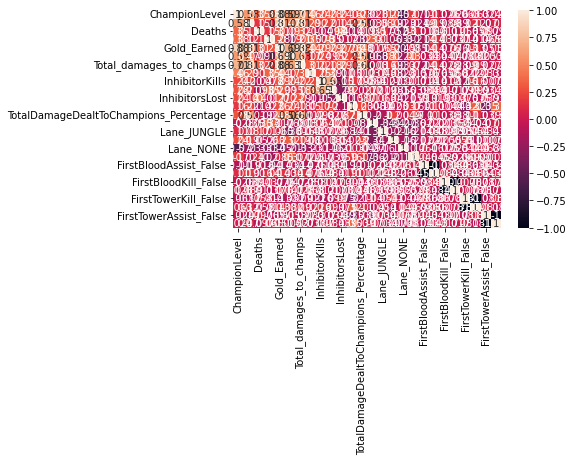

In [21]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (12,8)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
# split dataset into 70% training set and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
X_train.head()

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
16,15,10,4,11,13794,172,24315,1,0,1,...,0,1,0,1,1,0,1,0,1,0
41,10,2,11,4,6437,78,8496,0,0,0,...,0,1,1,0,1,0,1,0,1,0
22,11,1,5,5,6384,19,2431,0,0,0,...,0,0,1,0,1,0,1,0,1,0
20,17,4,8,7,14725,257,32661,0,0,0,...,0,1,1,0,1,0,1,0,1,0
53,13,2,8,3,8352,141,7824,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [24]:
model = LogisticRegression(solver = 'lbfgs').fit(X_train,y_train)

C:\Users\hong7\anacondanew\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Training Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.8434343434343434
Training Data Score: 0.8666666666666667


In [26]:
print(X_test)
print(y_test)

    ChampionLevel  Kills  Deaths  Assists  Gold_Earned  Total_Minions_Killed  \
50             11      1       8        3         6492                    44   
47             17     15      10       10        18536                   216   
52             13      7       2        8         9866                    22   
22              3      0       0        0          981                    15   
39             16      7       8        3        13196                   201   
..            ...    ...     ...      ...          ...                   ...   
47             17     14       1       15        18432                   248   
73             15      3       3        7         9664                   169   
35             15     12       2       10        14218                   155   
43             12      2      10        5         8059                    22   
16             12      1       0       10         9294                   158   

    Total_damages_to_champs  TeamBaronK

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
confusion_matrix(y_test, y_pred)

array([[101,  11],
       [ 23, 120]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       112
           1       0.92      0.84      0.88       143

    accuracy                           0.87       255
   macro avg       0.87      0.87      0.87       255
weighted avg       0.87      0.87      0.87       255



In [31]:
lane = df.groupby(['Win/Lose','Lane'])['Win/Lose'].count().unstack().fillna(0)

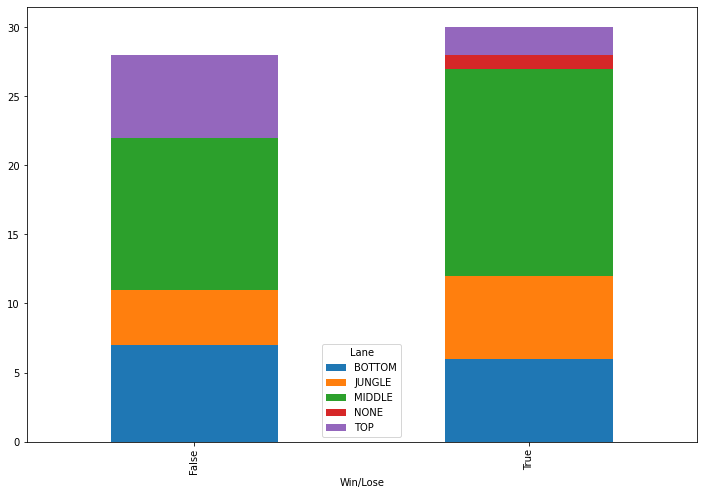

In [32]:
lane.plot(kind='bar', stacked=True)
plt.savefig("images/bar.png",bbox_inches = "tight")

## Side by Side boxplot to find relation between individual numeric variables and win/lose

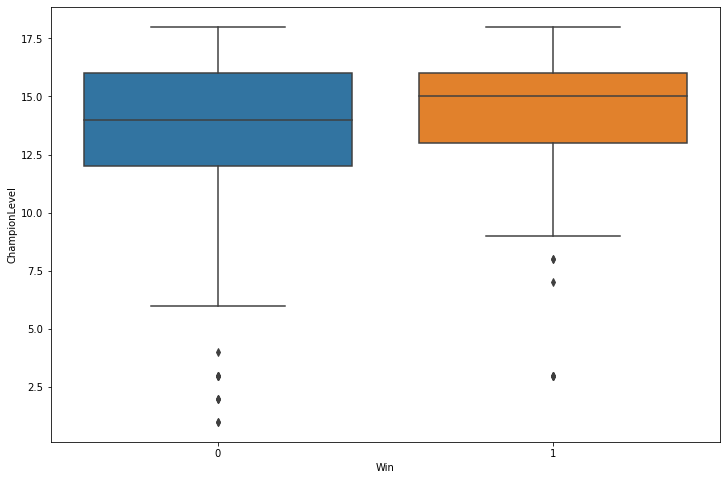

In [33]:
sn.boxplot(x='Win', y='ChampionLevel', data=df_final)
plt.savefig("images/ChampionLevel vs. Win_Lose.png",bbox_inches = "tight")

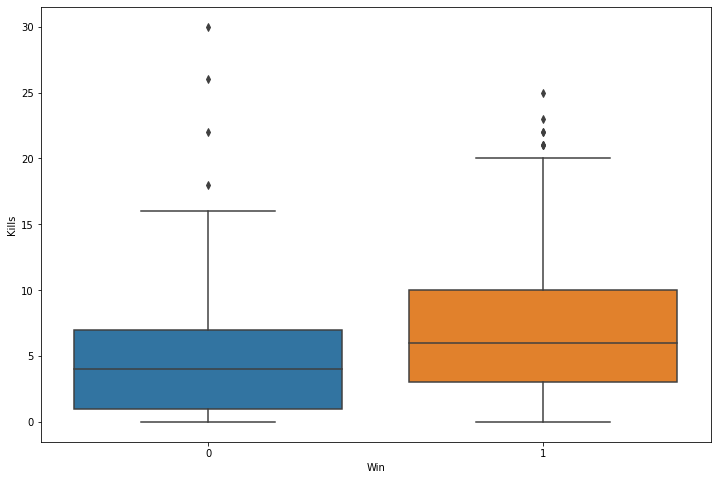

In [34]:
sn.boxplot(x='Win', y='Kills', data=df_final)
plt.savefig("images/Kills vs. Win_Lose.png",bbox_inches = "tight")

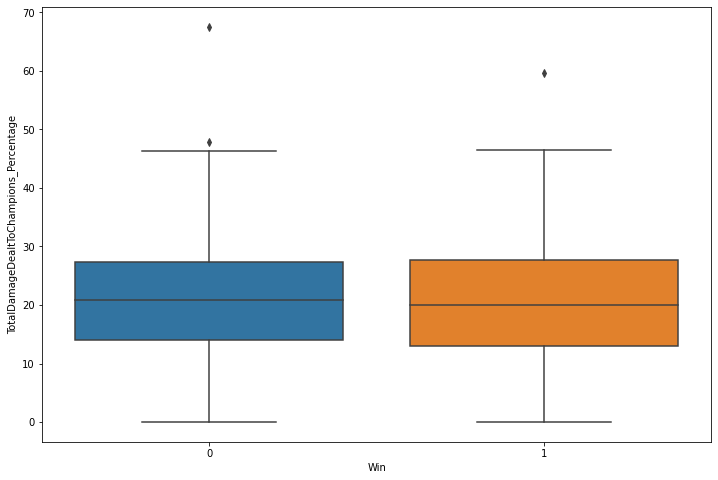

In [35]:
sn.boxplot(x='Win', y='TotalDamageDealtToChampions_Percentage', data=df_final)
plt.savefig("images/TotalDamageDealtToChampions_Percentage vs. Win_Lose.png",bbox_inches = "tight")

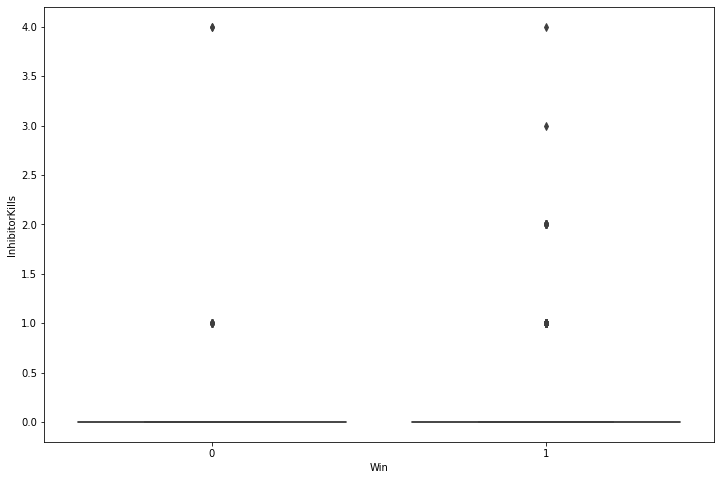

In [36]:
sn.boxplot(x='Win', y='InhibitorKills', data=df_final)
plt.savefig("images/InhibitorKills vs. Win_Lose.png",bbox_inches = "tight")

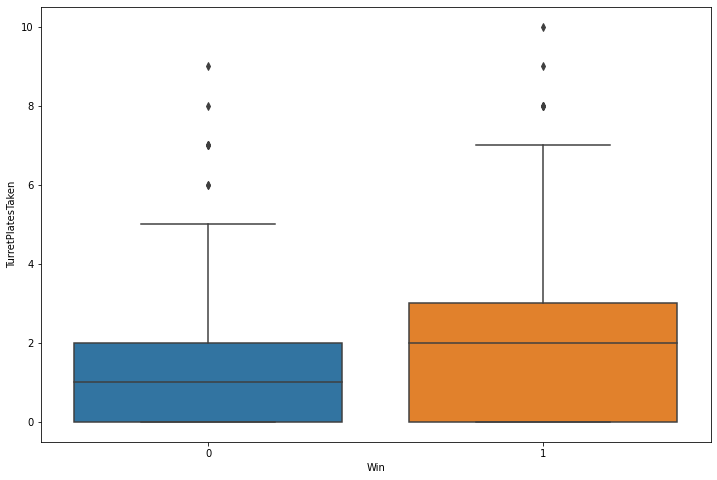

In [37]:
sn.boxplot(x='Win', y='TurretPlatesTaken', data=df_final)
plt.savefig("images/TurretPlatesTaken vs. Win_Lose.png",bbox_inches = "tight")

In [38]:
user_input = input("Who do you want to analyze? (Type in the desired User ID:)")
new_me = watcher.summoner.by_name(my_region, user_input)
print(new_me)

Who do you want to analyze? (Type in the desired User ID:)Evish
{'id': '6P1qXUhsDnWy_Em3QFRL9sy8z6mxr5usHnQQP158i9r-eg0', 'accountId': 'qGoawZI1H5ciZtLnOUzhbC7V5CamIYgivdLf7bQFZXhvwA', 'puuid': 'gYbM-WLV8AcByCNO3IhaeX5V3pXNRQ4j1cBhreMaxJThEzfgI3ztZll0t5Bwwzfo-03ai7abOh0FwQ', 'name': 'Evish', 'profileIconId': 4424, 'revisionDate': 1646555717000, 'summonerLevel': 428}


In [39]:
user_ranked_stats = watcher.league.by_summoner(my_region, new_me['id'])
pprint.pprint(user_ranked_stats)

[{'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': '07b06519-75a4-4217-aba2-ba8b7010ce7c',
  'leaguePoints': 34,
  'losses': 47,
  'queueType': 'RANKED_SOLO_5x5',
  'rank': 'IV',
  'summonerId': '6P1qXUhsDnWy_Em3QFRL9sy8z6mxr5usHnQQP158i9r-eg0',
  'summonerName': 'Evish',
  'tier': 'PLATINUM',
  'veteran': False,
  'wins': 62}]


In [40]:
new_total_games_plays = user_ranked_stats[0]['wins'] + user_ranked_stats[0]['losses']

user_matches = []

user_matches.extend(watcher.match.matchlist_by_puuid('americas', new_me['puuid'], 0, 100))
pprint.pprint(user_matches)

['NA1_4239003952',
 'NA1_4238948797',
 'NA1_4238954798',
 'NA1_4238917821',
 'NA1_4238880395',
 'NA1_4238825690',
 'NA1_4238736822',
 'NA1_4238689681',
 'NA1_4238644547',
 'NA1_4238578766',
 'NA1_4238565964',
 'NA1_4236191211',
 'NA1_4236117813',
 'NA1_4236125770',
 'NA1_4236092761',
 'NA1_4236057922',
 'NA1_4236061987',
 'NA1_4235969388',
 'NA1_4235963371',
 'NA1_4232424861',
 'NA1_4232450768',
 'NA1_4232378306',
 'NA1_4232384364',
 'NA1_4232371744',
 'NA1_4232088306',
 'NA1_4232066500',
 'NA1_4231970485',
 'NA1_4231878292',
 'NA1_4231912529',
 'NA1_4231857793',
 'NA1_4231834040',
 'NA1_4231767948',
 'NA1_4231782270',
 'NA1_4231740581',
 'NA1_4231686553',
 'NA1_4231683994',
 'NA1_4231710429',
 'NA1_4231638084',
 'NA1_4231634567',
 'NA1_4231609506',
 'NA1_4229140504',
 'NA1_4229097768',
 'NA1_4229065756',
 'NA1_4229073762',
 'NA1_4229061985',
 'NA1_4228745324',
 'NA1_4228675163',
 'NA1_4228681800',
 'NA1_4228105069',
 'NA1_4228097494',
 'NA1_4228055632',
 'NA1_4228053327',
 'NA1_422804

In [87]:
table_1 = []
no_challenges_count = 0
for user_match in user_matches:
    match_detail = watcher.match.by_id('americas', user_match)
    if match_detail["info"]['gameMode'] != 'CLASSIC':
        continue
    
    try:
        info = {}
        team_total_damages_to_champs = 0
        for participant in match_detail["info"]["participants"]:
            if participant["summonerName"] == new_me['name']:
                info["ChampionName"] = participant['championName']
                info["ChampionLevel"] = participant['champLevel']
                info["Lane"] = participant['lane']
                info["Kills"] = participant['kills']
                info["Deaths"] = participant['deaths']
                info["Assists"] = participant['assists']
                info["Gold_Earned"] = participant['goldEarned']
                info["Total_Minions_Killed"] = participant['totalMinionsKilled']
                info["Total_damages_to_champs"] = participant['totalDamageDealtToChampions']
                info["Win/Lose"] = participant['win']
                info["TeamBaronKills"] = participant['challenges']['teamBaronKills'] 
                info["FirstBloodAssist"] = participant['firstBloodAssist']
                info["FirstBloodKill"] = participant['firstBloodKill']
                info["FirstTowerAssist"] = participant['firstTowerAssist']
                info["FirstTowerKill"] = participant['firstTowerKill']
                info["InhibitorKills"] = participant['inhibitorKills']
                info["InhibitorTakedowns"] = participant['inhibitorTakedowns']
                info["InhibitorsLost"] = participant['inhibitorsLost']
                info["TurretPlatesTaken"] = participant['challenges']['turretPlatesTaken'] 


        for participant in match_detail["info"]["participants"]:
            if participant['win'] == info["Win/Lose"]:
                team_total_damages_to_champs += participant['totalDamageDealtToChampions']

        info["TotalDamageDealtToChampions_Percentage"] = round(info["Total_damages_to_champs"] / team_total_damages_to_champs * 100, 2)

        table_1.append(info)
        time.sleep(0.1)
    except:
        print(f"Failed to get match detail for match {user_match}")
        
    break

pprint.pprint(table_1)


[{'Assists': 8,
  'ChampionLevel': 14,
  'ChampionName': 'Senna',
  'Deaths': 12,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 10493,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 0,
  'InhibitorsLost': 1,
  'Kills': 3,
  'Lane': 'BOTTOM',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 8.85,
  'Total_Minions_Killed': 34,
  'Total_damages_to_champs': 10313,
  'TurretPlatesTaken': 1,
  'Win/Lose': False}]


In [114]:
user_data = {}
user_data['ChampionName'] = info['ChampionName']
user_data['ChampionLevel'] = info['ChampionLevel']
user_data['Kills'] = info['Kills']
user_data['Deaths'] = info['Deaths']
user_data['Assists'] = info['Assists']
user_data['Gold_Earned'] = info['Gold_Earned']
user_data['Total_Minions_Killed'] = info['Total_Minions_Killed']
user_data['Total_damages_to_champs'] = info['Total_damages_to_champs']
user_data['TeamBaronKills'] = info['TeamBaronKills']
user_data['InhibitorKills'] = info['InhibitorKills']
user_data['InhibitorTakedowns'] = info['InhibitorTakedowns']
user_data['InhibitorsLost'] = info['InhibitorsLost']
user_data['TurretPlatesTaken'] = info['TurretPlatesTaken']
user_data['TotalDamageDealtToChampions_Percentage'] = info['TotalDamageDealtToChampions_Percentage']
user_data['Win/Lose'] = info["Win/Lose"]
    
if info['Lane'] == "BOTTOM":
    user_data['Lane_BOTTOM'] = 1 
    user_data['Lane_MIDDLE'] = 0 
    user_data['Lane_JUNGLE'] = 0 
    user_data['Lane_NONE'] = 0 
    user_data['Lane_TOP'] = 0
elif info['Lane'] == "MIDDLE":
    user_data['Lane_MIDDLE'] = 1 
    user_data['Lane_BOTTOM'] = 0  
    user_data['Lane_JUNGLE'] = 0 
    user_data['Lane_NONE'] = 0 
    user_data['Lane_TOP'] = 0
elif info['Lane'] == "JUNGLE":
    user_data['Lane_JUNGLE'] = 1 
    user_data['Lane_BOTTOM'] = 0 
    user_data['Lane_MIDDLE'] = 0 
    user_data['Lane_NONE'] = 0 
    user_data['Lane_TOP'] = 0
elif info['Lane'] == "TOP":
    user_data['Lane_TOP'] = 1 
    user_data['Lane_BOTTOM'] = 0 
    user_data['Lane_MIDDLE'] = 0 
    user_data['Lane_JUNGLE'] = 0 
    user_data['Lane_NONE'] = 0
elif info['Lane'] == "NONE":
    user_data['Lane_NONE'] = 1 
    user_data['Lane_BOTTOM'] = 0 
    user_data['Lane_MIDDLE'] = 0 
    user_data['Lane_JUNGLE'] = 0 
    user_data['Lane_TOP'] = 0
    
if info['FirstBloodAssist'] == False:
    user_data['FirstBloodAssist_False'] = 1 
    user_data['FirstBloodAssist_True'] = 0
elif info['FirstBloodAssist'] == True:
    user_data['FirstBloodAssist_False'] = 0 
    user_data['FirstBloodAssist_True'] = 1
    

if info['FirstBloodKill'] == False:
    user_data['FirstBloodKill_False'] = 1 
    user_data['FirstBloodKill_True'] = 0
elif info['FirstBloodKill'] == True:
    user_data['FirstBloodKill_False'] = 0  
    user_data['FirstBloodKill_True'] = 1
    
if info['FirstTowerKill'] == False:
    user_data['FirstTowerKill_False'] = 1 
    user_data['FirstTowerKill_True'] = 0
elif info['FirstTowerKill'] == True:
    user_data['FirstTowerKill_False'] = 0 
    user_data['FirstTowerKill_True'] = 1
        
if info['FirstTowerAssist'] == False:
    user_data['FirstTowerAssist_False'] = 1 
    user_data['FirstTowerAssist_True'] = 0
elif info['FirstTowerAssist'] == True:
    user_data['FirstTowerAssist_False'] = 0 
    user_data['FirstTowerAssist_True'] = 1


user_data

{'ChampionName': 'Senna',
 'ChampionLevel': 14,
 'Kills': 3,
 'Deaths': 12,
 'Assists': 8,
 'Gold_Earned': 10493,
 'Total_Minions_Killed': 34,
 'Total_damages_to_champs': 10313,
 'TeamBaronKills': 0,
 'InhibitorKills': 0,
 'InhibitorTakedowns': 0,
 'InhibitorsLost': 1,
 'TurretPlatesTaken': 1,
 'TotalDamageDealtToChampions_Percentage': 8.85,
 'Win/Lose': False,
 'Lane_BOTTOM': 1,
 'Lane_MIDDLE': 0,
 'Lane_JUNGLE': 0,
 'Lane_NONE': 0,
 'Lane_TOP': 0,
 'FirstBloodAssist_False': 1,
 'FirstBloodAssist_True': 0,
 'FirstBloodKill_False': 1,
 'FirstBloodKill_True': 0,
 'FirstTowerKill_False': 1,
 'FirstTowerKill_True': 0,
 'FirstTowerAssist_False': 1,
 'FirstTowerAssist_True': 0}

In [120]:
table_2 = []
table_2.append(user_data)
df_user = pd.DataFrame(table_2)
df_user

,ChampionName,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
0,Senna,14,3,12,8,10493,34,10313,0,0,...,0,0,1,0,1,0,1,0,1,0


In [121]:
df_user["Win"] = np.where(df_user['Win/Lose'] == True, 1, 0)
df_user = df_user.drop(['Win/Lose', 'ChampionName'], axis = 1)
df_user


,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True,Win
0,14,3,12,8,10493,34,10313,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [122]:
X_user = df_user.drop(["Win"], axis=1)
y_user = df_user["Win"]
X_user

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
0,14,3,12,8,10493,34,10313,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [123]:
y_user_pred = model.predict(X_user)
print(y_user_pred)

[0]


In [126]:
if y_user_pred == 0:
    print("Unfortunately, we think he/she lost the last game.")
elif y_user_pred == 1:
    print("Yay! We think he/she won the last game!")

Unfortunately, we think he/she lost the last game.


In [128]:
print("Let's fact-check our prediction...")
if y_user_pred[0] == y_user[0]:
    print("Yes, our prediction is accurate.")
else:
    print("Oops, our prediction is wrong.")

Let's fact-check our prediction...
Yes, our prediction is accurate.
